In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
from scipy import stats
import sklearn

 # FCD

In [3]:
df_data = pd.read_csv("../tests/p-val_B.csv")
sorting = df_data.sort_values(by=['Error'])
groups = sorting['Group'].values
dists = sorting['Error'].values
ids = sorting['ID'].values

color= ['plum' if l == 1 else 'xkcd:azure' for l in groups]

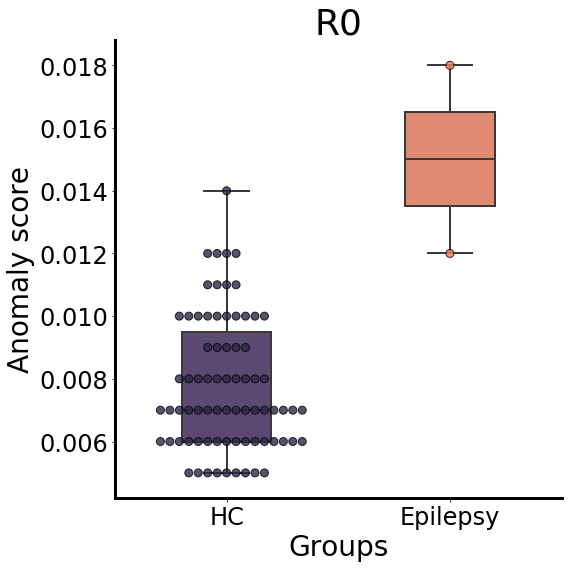

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
my_pal = {0: "#5b437a", 2: "#f1815f"}
my_pal2 = {0: "#2d284b", 2: "#f1815f"}
x_labels = ['HC','Epilepsy']
ax = sns.boxplot(x="Group", y="Error", data=df_data, showfliers = False, palette=my_pal, linewidth=2, width=0.4)
#ax = sns.violinplot(x="Group", y="Dist", data=df_data, showfliers = False, palette=my_pal, linewidth=2, width=0.45, cut=1.2, inner='quartile', bw=0.8)
ax = sns.swarmplot(x="Group", y="Error", data=df_data, size=8, edgecolor="black", linewidth=1, alpha=0.8, palette=my_pal2)
ax.set_xlabel("Groups",size=28)
ax.set_ylabel('Anomaly score',size=28)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
ax.set_title("R0", size=36)
ax.set_xticklabels(x_labels, rotation=0)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

sns.despine()
fig.tight_layout()
fig.savefig('MAE_epi', dpi=200)

### CNV

In [7]:
df_data = pd.read_csv("../tests/scores_RISH0_AutoEncoder_demo.csv")
sorting = df_data.sort_values(by=['Dist'])
groups = sorting['Group'].values
dists = sorting['Dist'].values
ids = sorting['ID'].values

color= ['plum' if l == 1 else 'xkcd:azure' for l in groups]

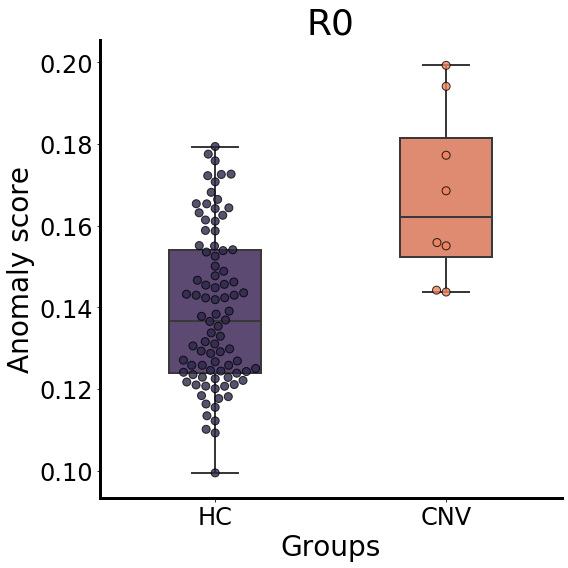

In [10]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
my_pal = {0: "#5b437a", 2: "#f1815f"}
my_pal2 = {0: "#2d284b", 2: "#f1815f"}
x_labels = ['HC','CNV']
ax = sns.boxplot(x="Group", y="Dist", data=df_data, showfliers = False, palette=my_pal, linewidth=2, width=0.4)
#ax = sns.violinplot(x="Group", y="Dist", data=df_data, showfliers = False, palette=my_pal, linewidth=2, width=0.45, cut=1.2, inner='quartile', bw=0.8)
ax = sns.swarmplot(x="Group", y="Dist", data=df_data, size=8, edgecolor="black", linewidth=1, alpha=0.8, palette=my_pal2)
ax.set_xlabel("Groups",size=28)
ax.set_ylabel('Anomaly score',size=28)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
ax.set_title("R0", size=36)
ax.set_xticklabels(x_labels, rotation=0)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

sns.despine()
fig.tight_layout()
fig.savefig('MAE_CNV', dpi=200)

0.5022132831956776 0.625 0.003137398124712254


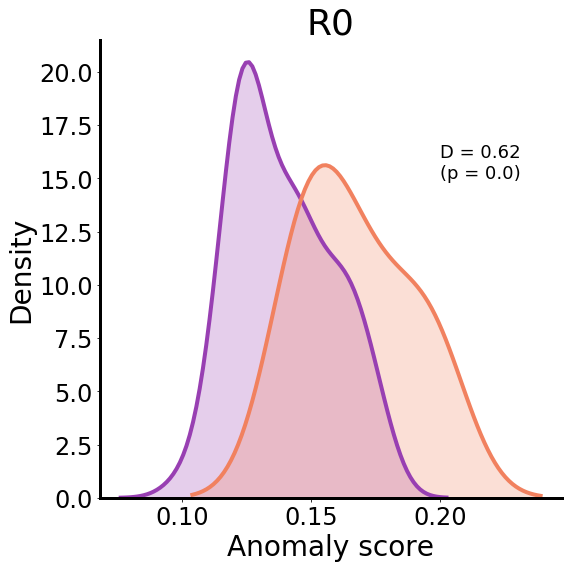

In [9]:
from scipy.stats import ks_2samp, entropy
x = df_data.loc[df_data['Group'] == 0].Dist.values
y = df_data.loc[df_data['Group'] == 2].Dist.values
DCrit = 1.36*np.sqrt((len(x)+len(y))/(len(x)*len(y)))
stat, p = ks_2samp(x, y)
print(DCrit, stat, p)
fig, ax = plt.subplots(1,1,figsize=(8, 8))
my_pal = {0: "#5b437a", 2: "#f1815f"}
my_pal2 = {0: "#2d284b", 2: "#f1815f"}
ax = sns.kdeplot(x, color="xkcd:purply", lw=4, shade=True)
ax = sns.kdeplot(y, color="#f1815f", lw=4, shade=True)
ax.set_xlabel("Anomaly score",size=28)
ax.set_ylabel('Density',size=28)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
ax.set_title("R0", size=36)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.text(0.2, 15,'D = '+ str(np.round(stat,2))+'\n(p = '+str(np.round(p,2))+')', fontsize=18)

sns.despine()
fig.tight_layout()
fig.savefig('KDE_CNV', dpi=200)

In [11]:
from scipy.stats import ks_2samp, ttest_ind
meanHC = np.mean(x)
std = np.std(x)
cnt = 0
stdcount = 0
for i in y:
    if i > meanHC:
        cnt = cnt + 1
    if i > meanHC+1.645*std:
        stdcount = stdcount + 1
print(cnt)
print(stdcount)
ttest_ind(x, y, equal_var=False)

8
3


Ttest_indResult(statistic=-3.5741835793862364, pvalue=0.0072065767248657075)

In [12]:
# calculate the Cohen's d between two samples
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

cohen = cohend(y,x)
print('Cohens d: %.3f' % cohen)

Cohens d: 1.463


## SCZH

In [13]:
df_data = pd.read_csv("../tests/scores_RISH0_AutoEncoder_SCHZ.csv")
sorting = df_data.sort_values(by=['Dist'])
groups = sorting['Group'].values
dists = sorting['Dist'].values
ids = sorting['ID'].values

color= ['plum' if l == 1 else 'xkcd:azure' for l in groups]

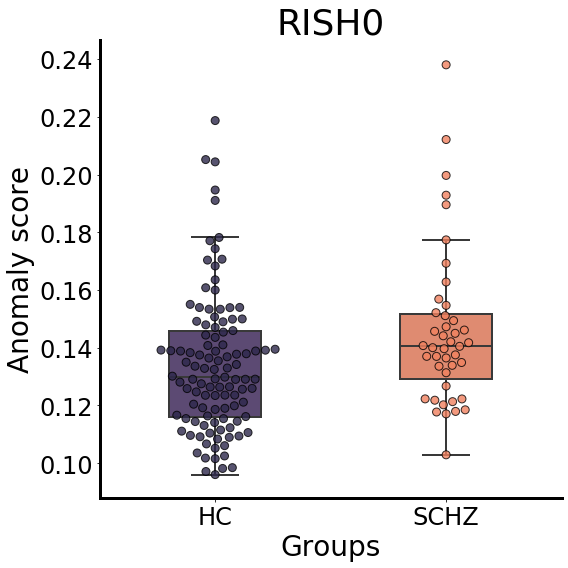

In [14]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
my_pal = {0: "#5b437a", 1: "#f1815f"}
my_pal2 = {0: "#2d284b", 1: "#f1815f"}
x_labels = ['HC','SCHZ']
ax = sns.boxplot(x="Group", y="Dist", data=df_data, showfliers = False, palette=my_pal, linewidth=2, width=0.4)
#ax = sns.violinplot(x="Group", y="Dist", data=df_data, showfliers = False, palette=my_pal, linewidth=2, width=0.45, cut=1.2, inner='quartile', bw=0.8)
ax = sns.swarmplot(x="Group", y="Dist", data=df_data, size=8, edgecolor="black", linewidth=1, alpha=0.8, palette=my_pal2)
ax.set_xlabel("Groups",size=28)
ax.set_ylabel('Anomaly score',size=28)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
ax.set_title("RISH0", size=36)
ax.set_xticklabels(x_labels, rotation=0)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

sns.despine()
fig.tight_layout()
fig.savefig('MAE_SCHZ', dpi=200)

0.24491378243745623 0.2622146362278643 0.022923554133941204


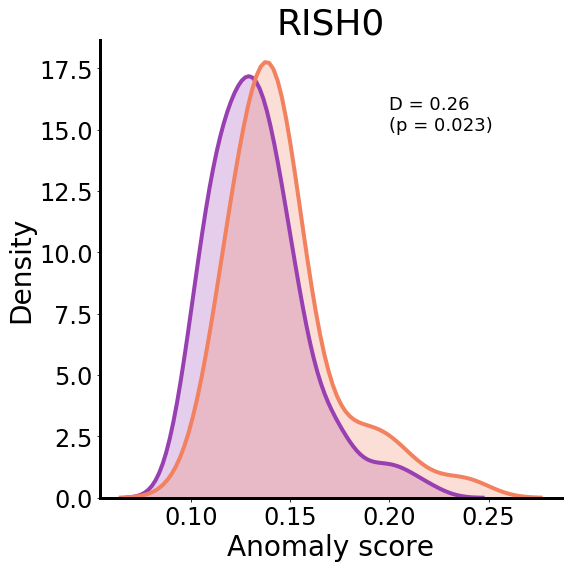

In [15]:
from scipy.stats import ks_2samp, ttest_ind
x = df_data.loc[df_data['Group'] == 0].Dist.values
y = df_data.loc[df_data['Group'] == 1].Dist.values
DCrit = 1.36*np.sqrt((len(x)+len(y))/(len(x)*len(y)))
stat, p = ks_2samp(x, y)
print(DCrit, stat, p)
fig, ax = plt.subplots(1,1,figsize=(8, 8))
my_pal = {0: "#5b437a", 2: "#f1815f"}
my_pal2 = {0: "#2d284b", 2: "#f1815f"}
ax = sns.kdeplot(x, color="xkcd:purply", lw=4, shade=True)
ax = sns.kdeplot(y, color="#f1815f", lw=4, shade=True)
ax.set_xlabel("Anomaly score",size=28)
ax.set_ylabel('Density',size=28)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
ax.set_title("RISH0", size=36)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.text(0.2, 15,'D = '+ str(np.round(stat,2))+'\n(p = '+str(np.round(p,3))+')', fontsize=18)
#ax.text(2.5, 0.5,'D = '+ str(np.round(stat,2))+'\n(p = '+str(np.round(p,1))+')', fontsize=18)
#ax.text(0.6, 1.5,'D = '+ str(np.round(stat,2))+'\n(p = '+str(np.round(p,1))+')', fontsize=18)

sns.despine()
fig.tight_layout()
fig.savefig('KDE_CNP', dpi=200)

In [16]:
meanHC = np.mean(x)
std = np.std(x)
cnt = 0
stdcount = 0
for i in y:
    if i > meanHC:
        cnt = cnt + 1
    if i > meanHC+1.645*std:
        stdcount = stdcount + 1
print(cnt)
print(stdcount)
ttest_ind(x, y, equal_var=False)

29
6


Ttest_indResult(statistic=-2.46417766077157, pvalue=0.016210550698812626)

In [17]:
cohen = cohend(y,x)
print('Cohens d: %.3f' % cohen)

Cohens d: 0.468


# Density of anomaly

In [18]:
df_data = pd.read_csv("../tests/anomaly-vector_RISH0_demo.csv")

In [19]:
subjs = df_data.loc[df_data['Group'] == 2] #1
subjs.drop(['Group', 'ID'], axis=1, inplace=True)
sumTab = subjs.sum()

C:\Users\sapmc3\AppData\Local\Continuum\anaconda3\envs\detect\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
bundles = ['AF_L', 'AF_R', 'ATR_L', 'ATR_R', 'CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CG_L', 'CG_R', 'IFO_L', 'IFO_R', 'ILF_L', 'ILF_R', 'OR_L', 'OR_R', 
           'SLF_I_L',  'SLF_I_R', 'SLF_II_L', 'SLF_II_R', 'SLF_III_L', 'SLF_III_R', 'UF_L', 'UF_R'] 
bundles = ['AF_L', 'AF_R', 'ATR_L', 'ATR_R', 'CC_1', 'CC_2', 'CC_6', 'CC_7', 'CG_L', 'CG_R', 'CST_L', 'CST_R', 'IFO_L', 'IFO_R', 'ILF_L', 'ILF_R', 'OR_L', 'OR_R', 
           'SLF_I_L',  'SLF_I_R', 'SLF_II_L', 'SLF_II_R', 'SLF_III_L', 'SLF_III_R', 'UF_L', 'UF_R']  

In [21]:
perBundle = subjs.groupby((np.arange(len(subjs.columns)) // 20) + 1, axis=1).sum().add_prefix('s')
perBundle.columns = bundles
nb = perBundle.astype(bool).sum(axis=0)

In [22]:
perBundle.loc['Total']= perBundle.astype(bool).sum()
perBundle.loc['TotalCount']= perBundle.sum()

In [23]:
sortedVals = perBundle.sort_values(by='Total', ascending=False, axis=1)
bundles = sortedVals.columns
plot = np.sort(perBundle.loc['Total'])[::-1]

sortedValsCount = perBundle.sort_values(by='TotalCount', ascending=False, axis=1)
bundlesCount = sortedValsCount.columns
plotCount = np.sort(perBundle.loc['TotalCount'])[::-1]

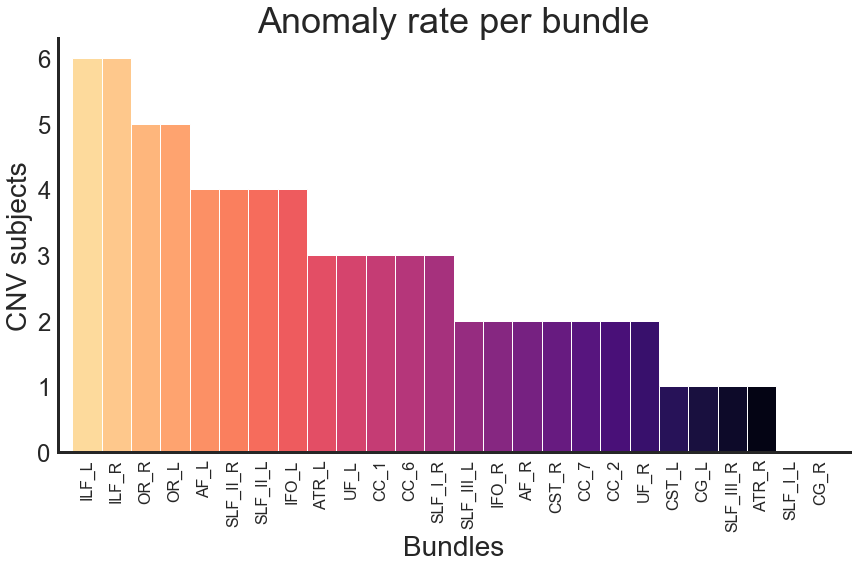

In [24]:
#plot = nb
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("white")
from matplotlib.colors import Normalize
my_cmap = cm.get_cmap('magma_r')
my_norm = Normalize(vmin=0, vmax=len(bundles))
fig, ax = plt.subplots(1,1,figsize=(12, 8))
ax.set_xlim(-1,len(bundles))
ax.set_xlabel("Bundles",size=28)
ax.set_ylabel("CNV subjects",size=28)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=16)
ax.set_xticks(np.arange(0, len(bundles), 1))
ax.set_title("Anomaly rate per bundle", size=36)
ax.set_xticklabels(bundles, rotation=90)
ax.bar(np.arange(0,len(bundles)),plot, color=my_cmap(my_norm(np.arange(2,len(bundles)+2))), alpha=1, edgecolor="white", width=1.0)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
sns.despine()

fig.tight_layout()
fig.savefig('anomaly-rate-CNV.png', dpi=200)

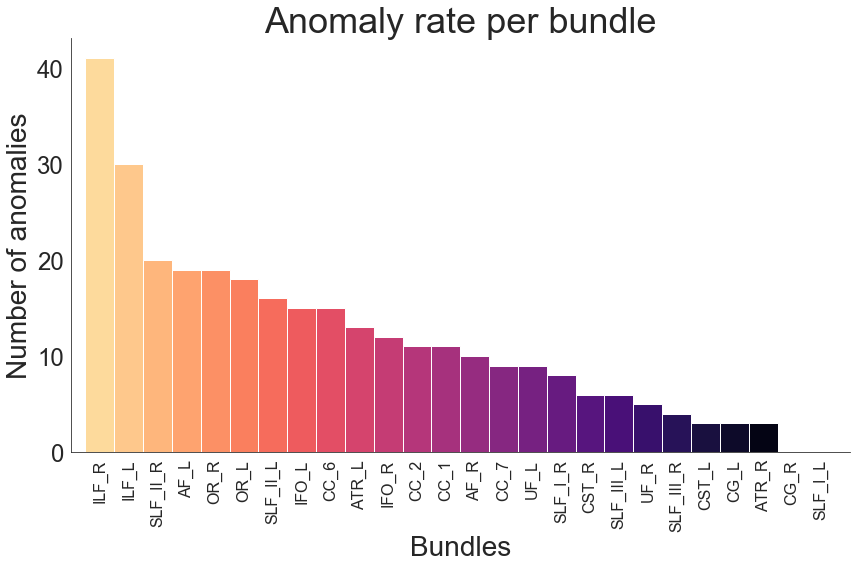

In [25]:
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("white")
from matplotlib.colors import Normalize
my_cmap = cm.get_cmap('magma_r')
my_norm = Normalize(vmin=0, vmax=len(bundles))
sortedVal = np.sort(plot)[::-1]


fig, ax = plt.subplots(1,1,figsize=(12, 8))
ax.set_xlim(-1,len(bundles))
ax.set_xlabel("Bundles",size=28)
ax.set_ylabel("Number of anomalies",size=28)

ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=16)
ax.set_xticks(np.arange(0, len(bundles), 1))
ax.set_title("Anomaly rate per bundle", size=36)
ax.set_xticklabels(bundlesCount, rotation=90)
ax.bar(np.arange(0,len(bundles)),plotCount, color=my_cmap(my_norm(np.arange(2,len(bundles)+2))), alpha=1, edgecolor="white", width=1.0)
sns.despine()

fig.tight_layout()